In [1]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data= pd.read_csv('C:\\Users\\Milgram\\Desktop\\POC\\train.tsv',delimiter='\t',encoding='utf-8')

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df0=data[data.Sentiment == 0]
df0.sort_values(by=['Phrase'], inplace=True,ascending=False)
df0.head(10)
x=df0['Phrase'].value_counts()
d0 = pd.Series(x).reset_index(name='Count').rename(columns={'index':'Phrase'}) 
#df1=data.head(15)
d0.sort_values(by=['Count'], inplace=True,ascending=False)
d0.head(10)

C:\Users\Milgram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Phrase,Count
0,horrible movie,1
4710,"Cold , Sterile And Lacking",1
4721,"Unfortunately , it 's also not very good .",1
4720,It 's fitting that a movie as artificial and s...,1
4719,"Aloof and lacks any real raw emotion , which i...",1
4718,slides downhill as soon as macho action conven...,1
4717,is an all-time low for Kevin Costner .,1
4716,"Lacks the spirit of the previous two , and mak...",1
4715,appears not to have been edited at all,1
4714,No amount of nostalgia for Carvey 's glory day...,1


In [5]:
d0

,Phrase,Count
0,horrible movie,1
4710,"Cold , Sterile And Lacking",1
4721,"Unfortunately , it 's also not very good .",1
4720,It 's fitting that a movie as artificial and s...,1
4719,"Aloof and lacks any real raw emotion , which i...",1
...,...,...
2354,falling short as a whole,1
2353,is standard crime drama fare ... instantly for...,1
2352,"all for easy sanctimony , formulaic thrills an...",1
2351,never gets off the ground .,1


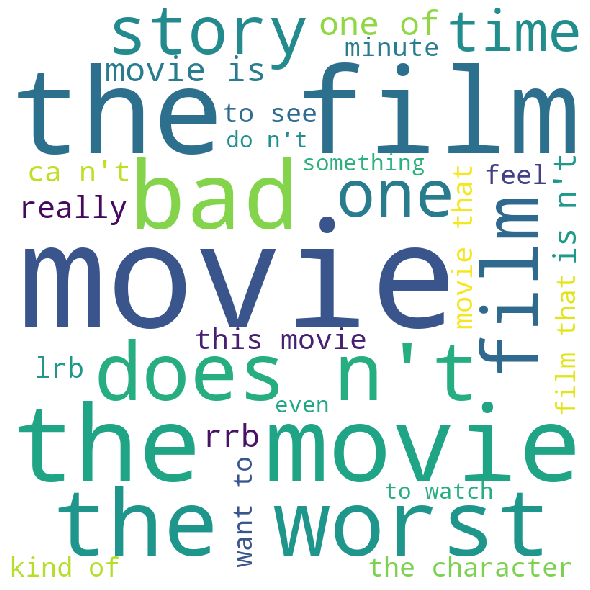

In [6]:
airtemp_fig = figure()
windspeed_fig = figure()
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in d0['Phrase']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, max_words=30,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 2).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [7]:
wordcloud.to_file("C:\\Users\\Milgram\\Anaconda3\\Lib\\site-packages\\bokeh\\server\\static\\image\\d0.png")

In [8]:
d1=data[data.Sentiment == 1]

In [ ]:
airtemp_fig = figure()
windspeed_fig = figure()
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in d1['Phrase']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, max_words=30,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 2).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
wordcloud.to_file("d1.png")


In [ ]:
from bokeh.io import curdoc
from bokeh.layouts import row
from bokeh.models.widgets import Slider, Div

def change_img(attr, old, new):
    if slider.value == 1:
        logo.text = """<img src="static\\image\\d1.png"  alt="image">"""
    else:
        logo.text = """<img src="static\\image\\d0.png"  alt="image">"""

slider = Slider(start=1, end=2, value=1, title="image number")
slider.on_change('value', change_img)
logo = Div(text="""<img src="static\\image\\wc.png"  alt="image">""")
#logo = Div(text="""<img src="static/image/logo.png"  alt="logo">""")

curdoc().add_root(row(slider,logo))
curdoc().title = "Image Demo"

In [ ]:
#C:\Users\Neha3.singh\AppData\Local\Continuum\anaconda3\Lib\site-packages\bokeh\server\static\image

In [ ]:

# from bokeh.io import curdoc
# from bokeh.layouts import row,column
# from bokeh.models.widgets import Slider, Div


# p3 = figure(plot_width=650, plot_height=450, title="Verbalism of Mitigation Step")
# p3.image_url(url=['C:\\Users\\Neha3.singh\\wc.png'], x=0, y=0, w=0.8, h=0.8,anchor="bottom_left")
# p3.xaxis.visible = None
# p3.yaxis.visible =None
# p3.title.text_font_size = '13pt' 
# p3.title.text_color="navy" 


# def change_img(attr, old, new):
#     if slider.value == 0:
#         logo.text = """<img src="d0.png"  alt="logo">"""
#     elif slider.value == 1:
#         logo.text = """<img src="d1.png"  alt="logo">"""
# #     elif slider.value == 2:
# #         logo.text = """<img src="Sentiment2.png"  alt="logo">"""
# #     elif slider.value == 3:
# #         logo.text = """<img src="Sentiment3.png"  alt="logo">"""
# #     else:
# #         logo.text = """<img src="Sentiment4.png"  alt="logo">"""


# slider = Slider(start=0, end=1, value=0, title="Sentiment")
# slider.on_change('value', change_img)
# logo = Div(text="""<img src="Sentiment0.png"  alt="logo">""")
# # curdoc().add_root(row(slider,logo))
# # curdoc().title = "Image Demo"
# input=c(logo,slider)
# show(input)

In [ ]:
# from bokeh.io import curdoc
# from bokeh.layouts import row,column
# from bokeh.models.widgets import Slider, Div
# from bokeh.plotting import figure

# p3 = figure(plot_width=650, plot_height=450, title="Verbalism of Mitigation Step")
# p3.image_url(url=['C:\\Users\\Neha3.singh\\d0.png'], x=0, y=0, w=0.8, h=0.8,anchor="bottom_left")
# p3.xaxis.visible = None
# p3.yaxis.visible =None
# p3.title.text_font_size = '13pt' 
# p3.title.text_color="navy" 
# show(p3,notebook_handle=True)
